Import Statements:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopy.distance


Creating the dataframe:

In [4]:
df = pd.read_csv("Input/business_list_dis4.csv")
df.head(300)


Unnamed: 0   latitude  longitude                      business_name  \
0          2668  42.311327 -71.080831                      wingz + tingz   
1          2671  42.305682 -71.081282             washington columbia li   
2          2672  42.305682 -71.081282  washington columbia ii apartments   
3          2673  42.305404 -71.081098             washington columbia ii   
4          2675  42.307953 -71.083183                       vip wireless   
..          ...        ...        ...                                ...   
295        3431  42.299588 -71.060542     golden star chinese restaurant   
296        3433  42.297425 -71.060785        gadget repair king wireless   
297        3434  42.298222 -71.060480         friends of andrea campbell   
298        3435  42.299118 -71.060189                frank & company inc   
299        3437  42.298222 -71.060480               found in translation   

          street_address  ZIP_code  NAICS_2017_6digit_code  \
0      388 Blue Hill Ave      2121                  722511   
1       95 Washington St      2121                  531210   
2       95 Washington St      2121                       0   
3        102 Columbia Rd      2121                       0   
4      482 Blue Hill Ave      2121                  517312   
..                   ...       ...                     ...   
295  1495 Dorchester Ave      2122                  722511   
296  1560 Dorchester Ave      2122                  517312   
297  1534 Dorchester Ave      2122                  813940   
298  1510 Dorchester Ave      2122                  621210   
299  1534 Dorchester Ave      2122                  541930   

                                NAICS_2017_6digit_desc  \
0                             Full-Service Restaurants   
1            Offices of Real Estate Agents and Brokers   
2                                                        
3                                                        
4    Wireless Telecommunications Carriers (except S...   
..                                                 ...   
295                           Full-Service Restaurants   
296  Wireless Telecommunications Carriers (except S...   
297                            Political Organizations   
298                                Offices of Dentists   
299            Translation and Interpretation Services   

     NAICS_2017_2digit_code                            NAICS_2017_2digit_desc  \
0                        72                   Accommodation and Food Services   
1                        53                    Real Estate Rental and Leasing   
2                        99                                         Undefined   
3                        99                                         Undefined   
4                        51                                       Information   
..                      ...                                               ...   
295                      72                   Accommodation and Food Services   
296                      51                                       Information   
297                      81                                    Other Services   
298                      62                  Healthcare and Social Assistance   
299                      54  Professional, Scientific, and Technical Services   

     estimated_employment employment_buckets          mainstreet  inDis4  
0                       5             1 to 9  Greater Grove Hall    True  
1                       3             1 to 9  Greater Grove Hall    True  
2                       5             1 to 9  Greater Grove Hall    True  
3                       0      Not Available  Greater Grove Hall    True  
4                       2             1 to 9  Greater Grove Hall    True  
..                    ...                ...                 ...     ...  
295                     8             1 to 9       Fields Corner    True  
296                     2             1 to 9       Fields Corner    True  
29

In [3]:
business_count = df.NAICS_2017_6digit_desc.value_counts()
x_data = business_count.index
y_data = business_count
df_new = pd.DataFrame({'Business_type':x_data, "Count":y_data})
df_new.to_csv("Business_type_count.csv",index=False)

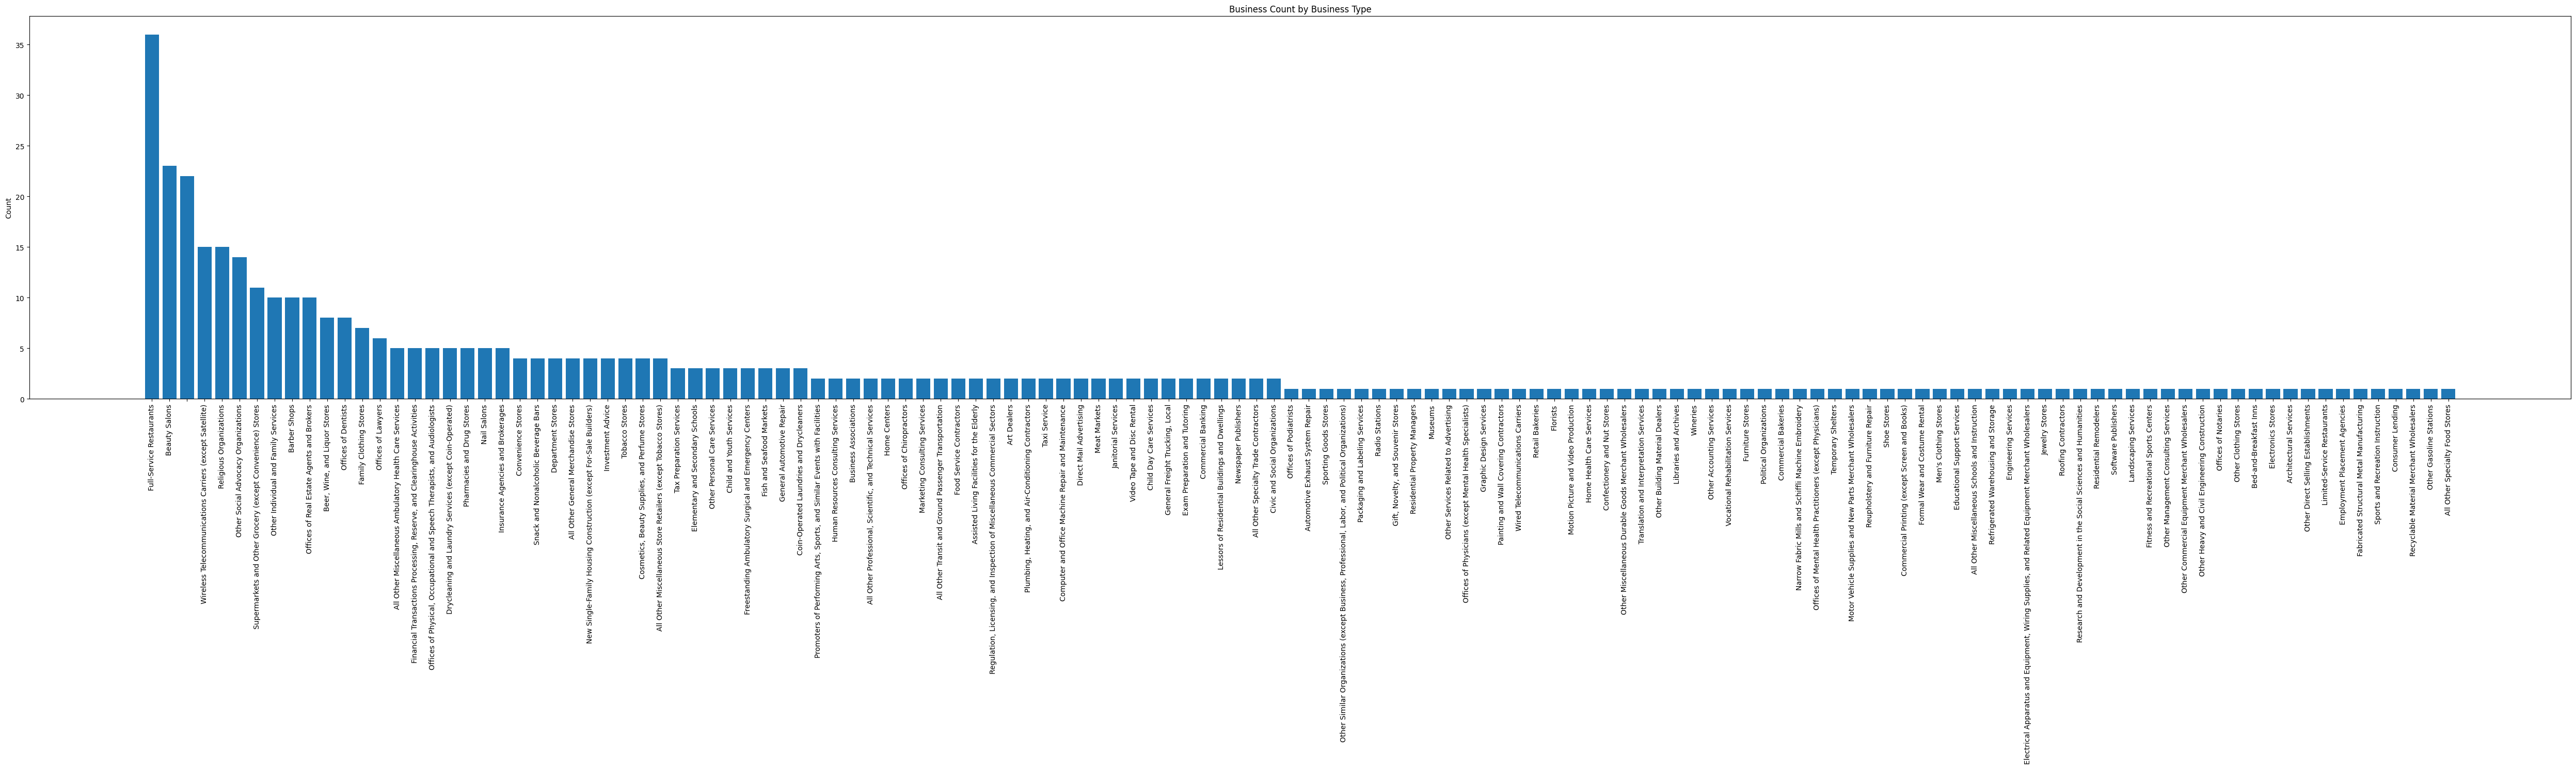

In [4]:
plt.figure(figsize=(50,15))
plt.bar(x_data, y_data)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Business Count by Business Type')
plt.tight_layout()
plt.savefig('Business Type Count.jpg')
plt.show()


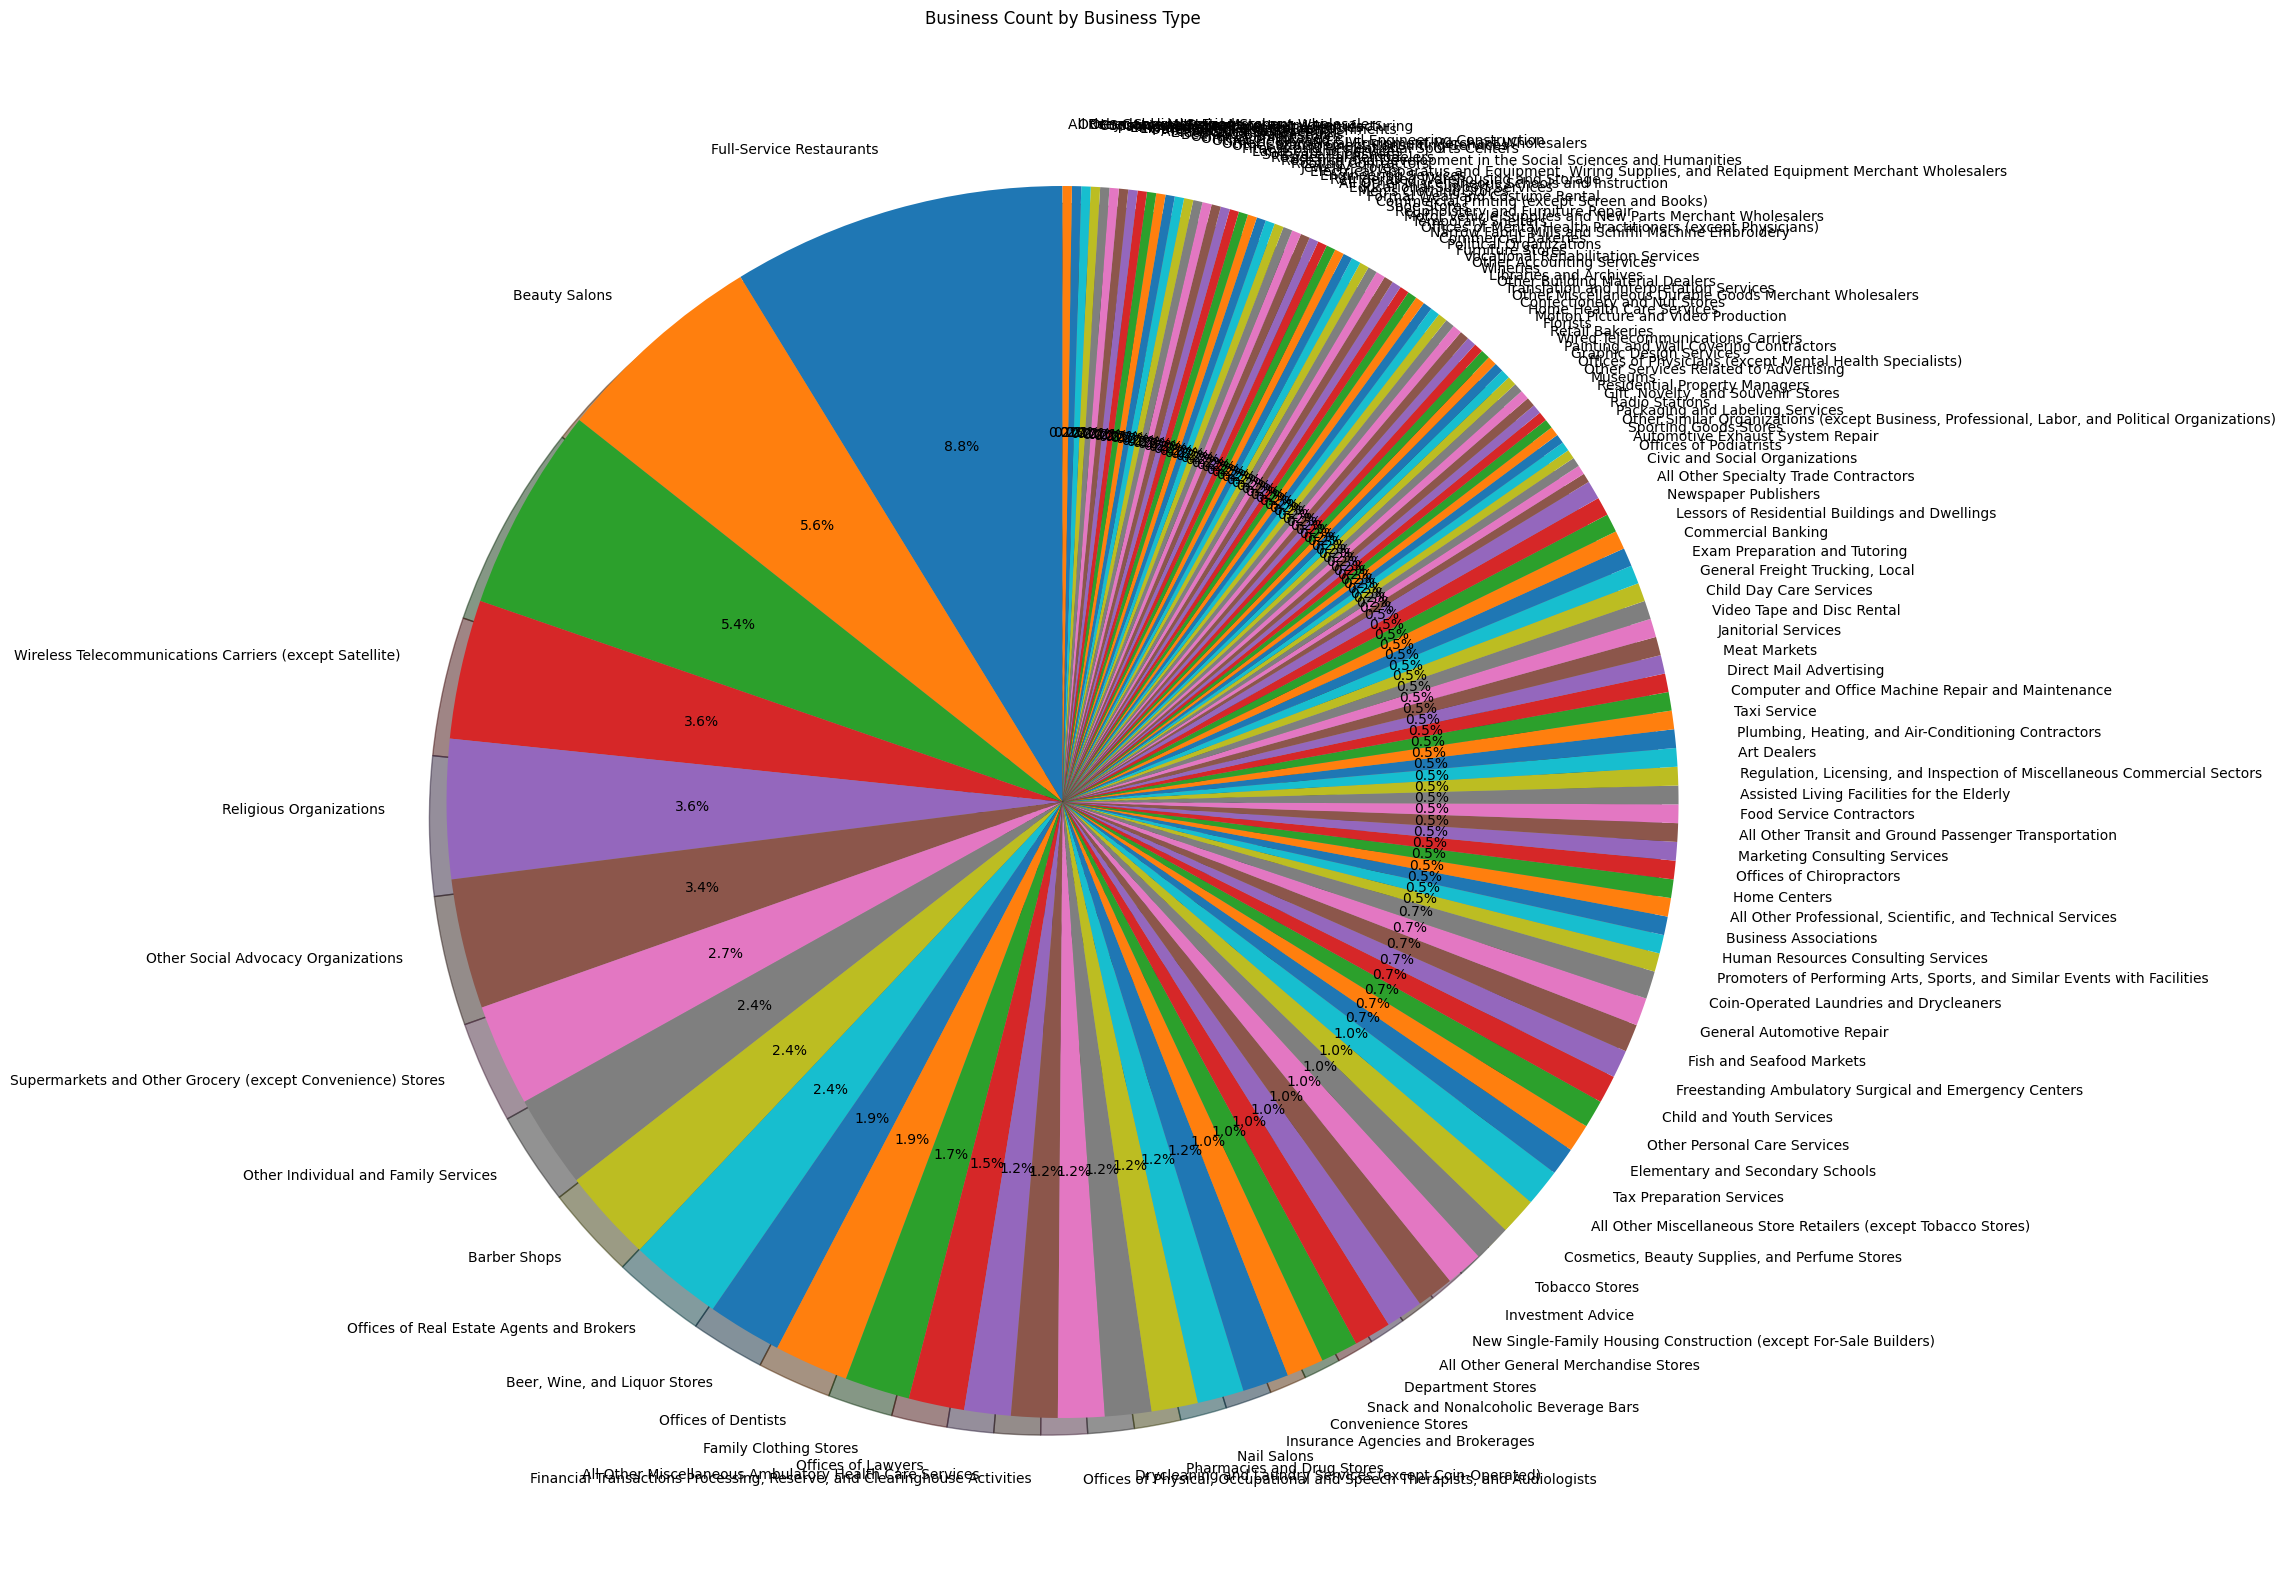

In [20]:
plt.figure(figsize=(20,20))
plt.pie(y_data, labels=x_data, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Business Count by Business Type')
plt.savefig('Business Type Count Pie.jpg')
plt.show()


In [6]:
# make a map of businesses by business type, each business type is a different color, if the business count for that type is less than 2, the color is white
# make a list of business types
business_type_list = df.NAICS_2017_6digit_desc.unique()
# make a list of colors
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
# make a list of business type and color
business_type_color = zip(business_type_list, color_list)
# make a map
map = folium.Map(location=[42.3581, -71.0636], zoom_start=12)
for business_type, color in business_type_color:
    df_business = df[df.NAICS_2017_6digit_desc == business_type]
    if len(df_business) > 2:
        for index, row in df_business.iterrows():
            folium.Marker([row['latitude'], row['longitude']], popup=row['NAICS_2017_6digit_desc'], icon=folium.Icon(color=color, icon='info-sign')).add_to(map)
    else:
        for index, row in df_business.iterrows():
            folium.Marker([row['latitude'], row['longitude']], popup=row['NAICS_2017_6digit_desc'], icon=folium.Icon(color=color, icon='info-sign')).add_to(map)
map.save('Business Type Map.html')

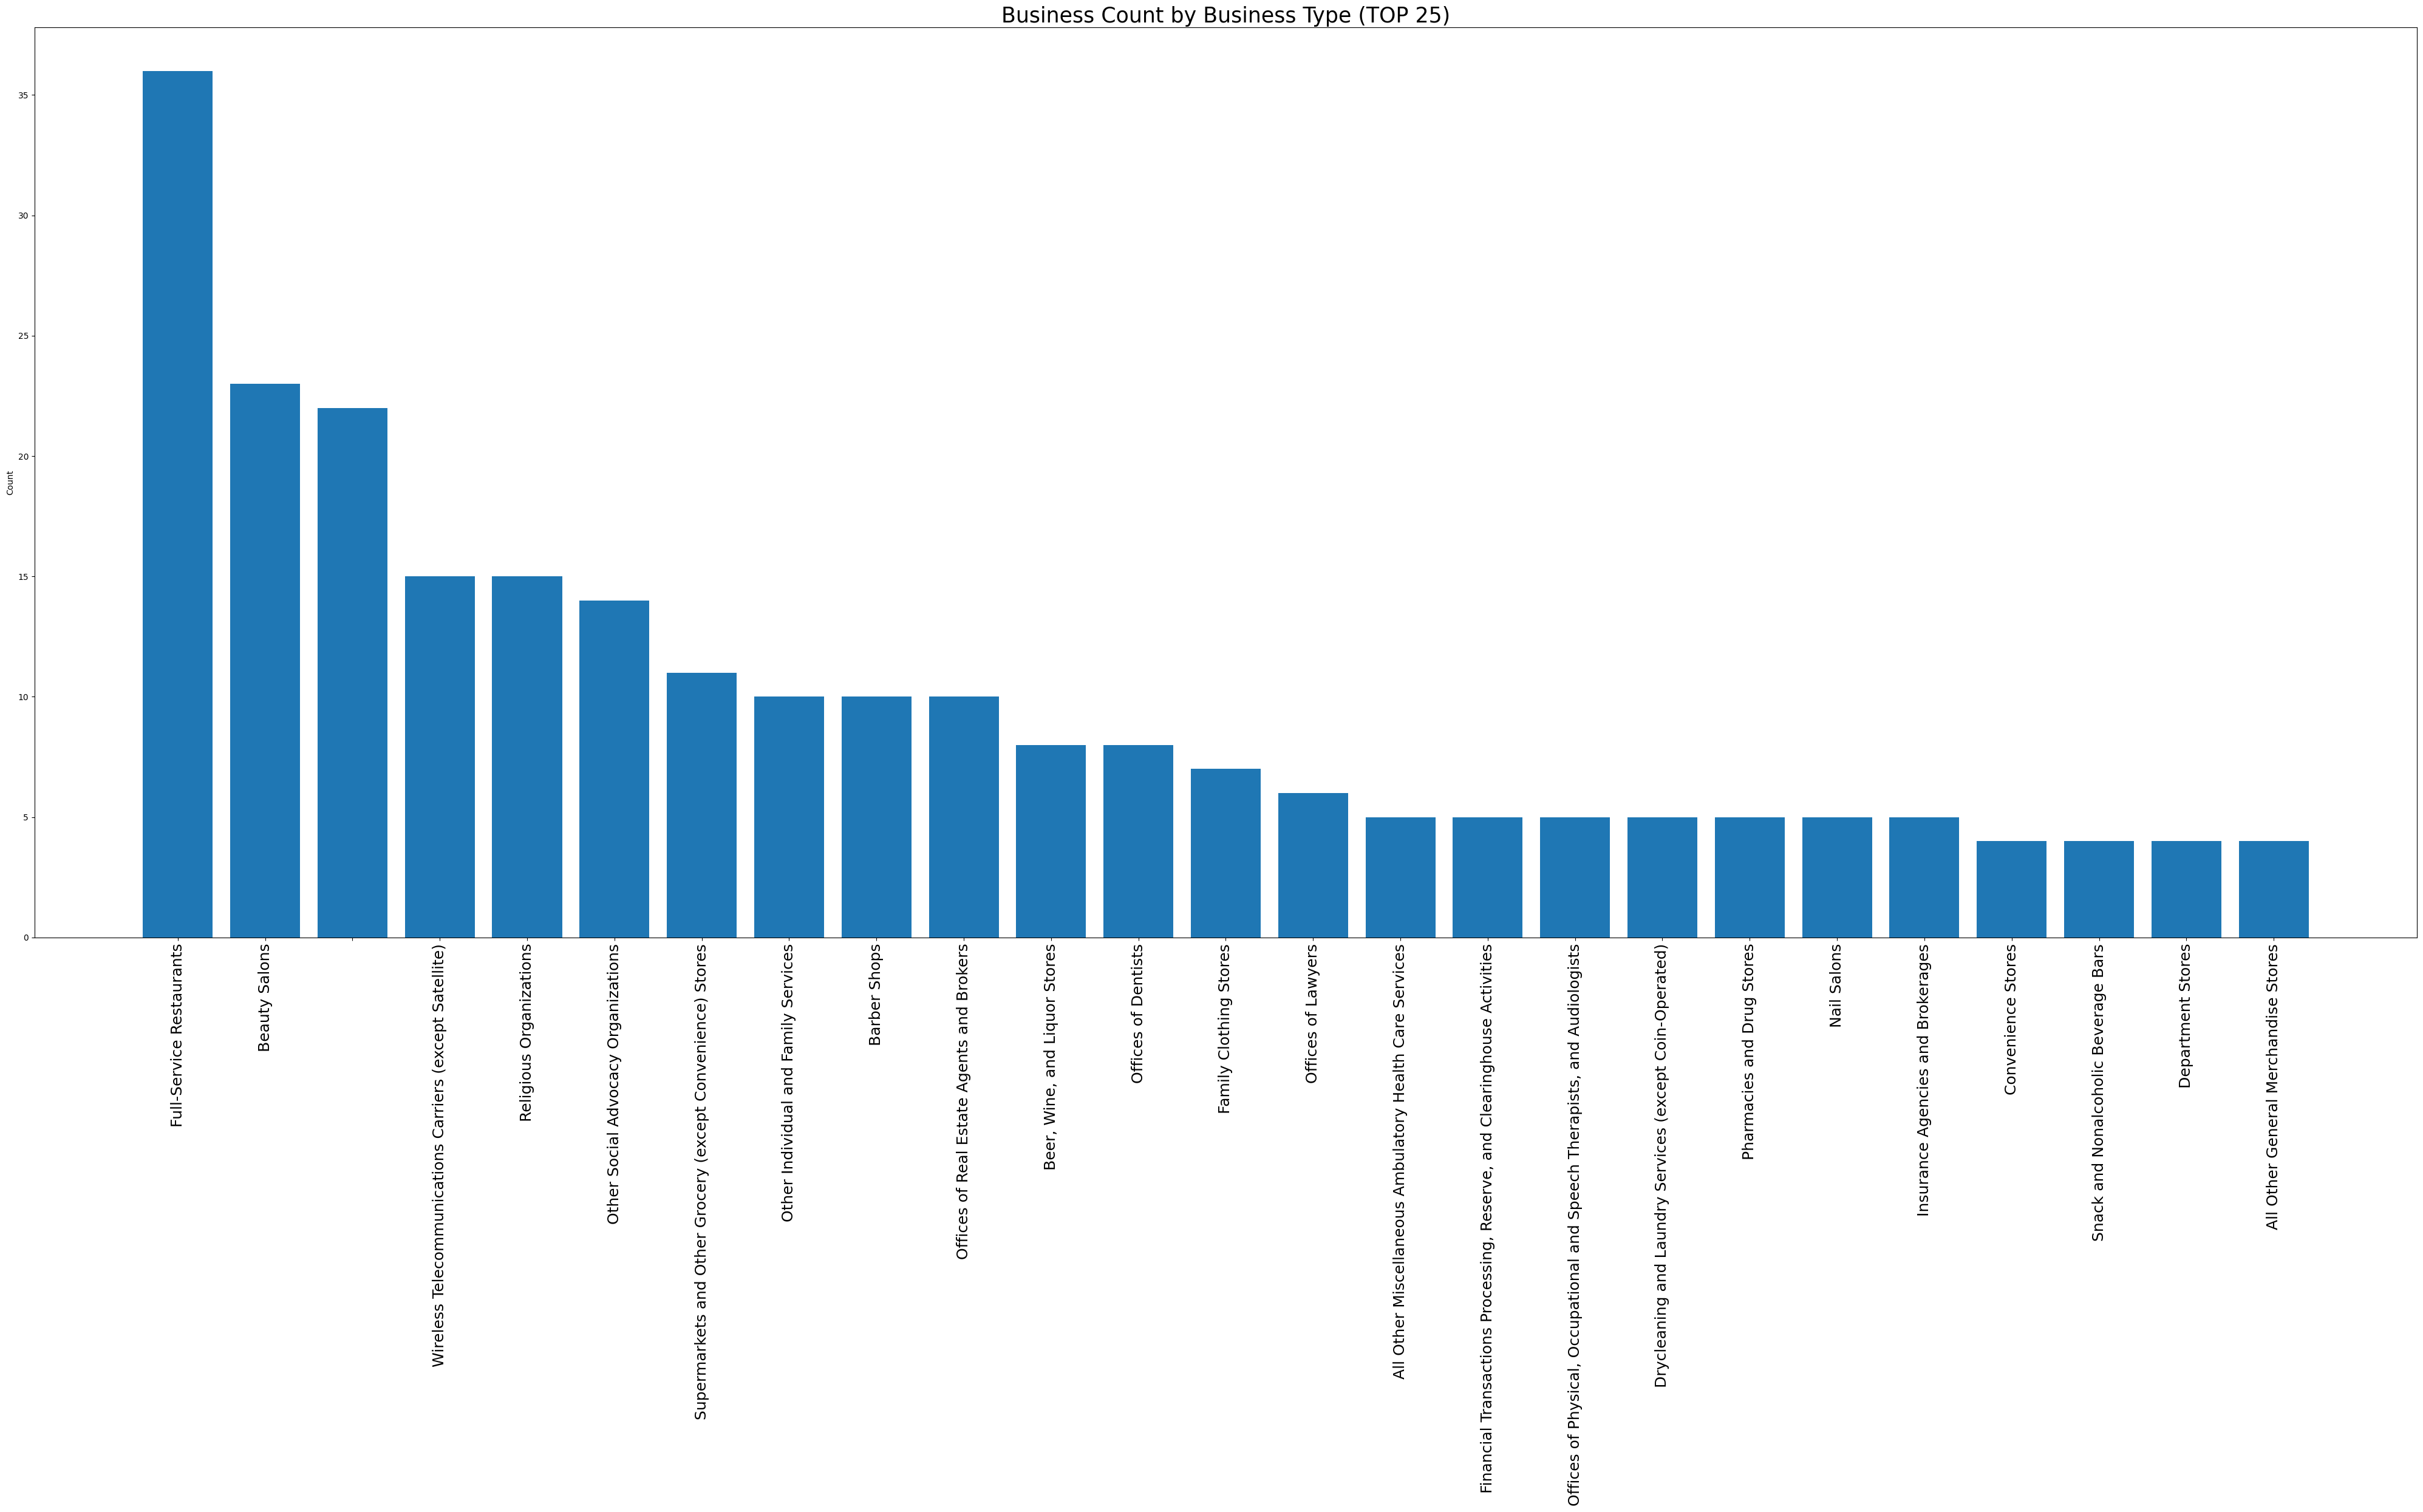

In [42]:
# make a bar graph of the 25 most common business types
business_count = df.NAICS_2017_6digit_desc.value_counts()
x_data = business_count.index
y_data = business_count
df_new = pd.DataFrame({'Business_type':x_data, "Count":y_data})

plt.figure(figsize=(40,25))
plt.bar(x_data[:25], y_data[:25])
plt.xticks(fontsize = 18, rotation=90)
plt.ylabel('Count')
plt.title('Business Count by Business Type (TOP 25)', fontsize = 25)
plt.tight_layout()
plt.savefig('Business Type Count (Top 25).jpg')
plt.show()

In [5]:
# create a map of Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# add a marker for each business
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['NAICS_2017_6digit_desc']).add_to(m)

# save the map
m.save('map.html')


In [20]:
# use geopy distance to figure out the average distance between businesses based on NAICS_2017_6digit_desc

# find the unique business types
business_types = df.NAICS_2017_6digit_desc.unique()

# find the average distance between each business type and save it to a dictionary
distance_dict = {}
for business_type in business_types:
    # find the businesses of the current business type
    df_business = df[df.NAICS_2017_6digit_desc == business_type]
    # find the average distance between each business and save it to a dictionary

    distance_list = []
    for index, row in df_business.iterrows():
        # find the distance between the current business and all other businesses
        for index2, row2 in df_business.iterrows():
            if index != index2:
                distance = geopy.distance.distance((row['latitude'], row['longitude']), (row2['latitude'], row2['longitude'])).miles
                distance_list.append(distance)
    # find the average distance between businesses

    if len(distance_list) == 0:
        pass

    else:
        x = df_new[business_type]["count"]
        for i in x:
            if i == 1:
                pass
            else:
                average_distance = sum(distance_list) / len(distance_list)
                distance_dict[business_type] = average_distance

# find the business type with the largest average distance
largest_distance = max(distance_dict.values())
largest_business_type = max(distance_dict, key=distance_dict.get)

# find the business type with the smallest average distance
smallest_distance = min(distance_dict.values())
smallest_business_type = min(distance_dict, key=distance_dict.get)

# print the results
print("The business type with the largest average distance between businesses is " + largest_business_type + " with an average distance of " + str(largest_distance) + " miles.")
print("The business type with the smallest average distance between businesses is " + smallest_business_type + " with an average distance of " + str(smallest_distance) + " miles.")

# make a bar graph of the business type and their average distance
plt.figure(figsize=(40,25))
plt.bar(distance_dict.keys(), distance_dict.values())
plt.xticks(rotation=90)
plt.ylabel('Average Distance Between Businesses (miles)')
plt.title('Average Distance Between Businesses by Business Type')
plt.tight_layout()
plt.savefig('Average Distance Between Businesses by Business Type.jpg')
plt.show()


KeyError: 'Full-Service Restaurants'

<class 'str'>


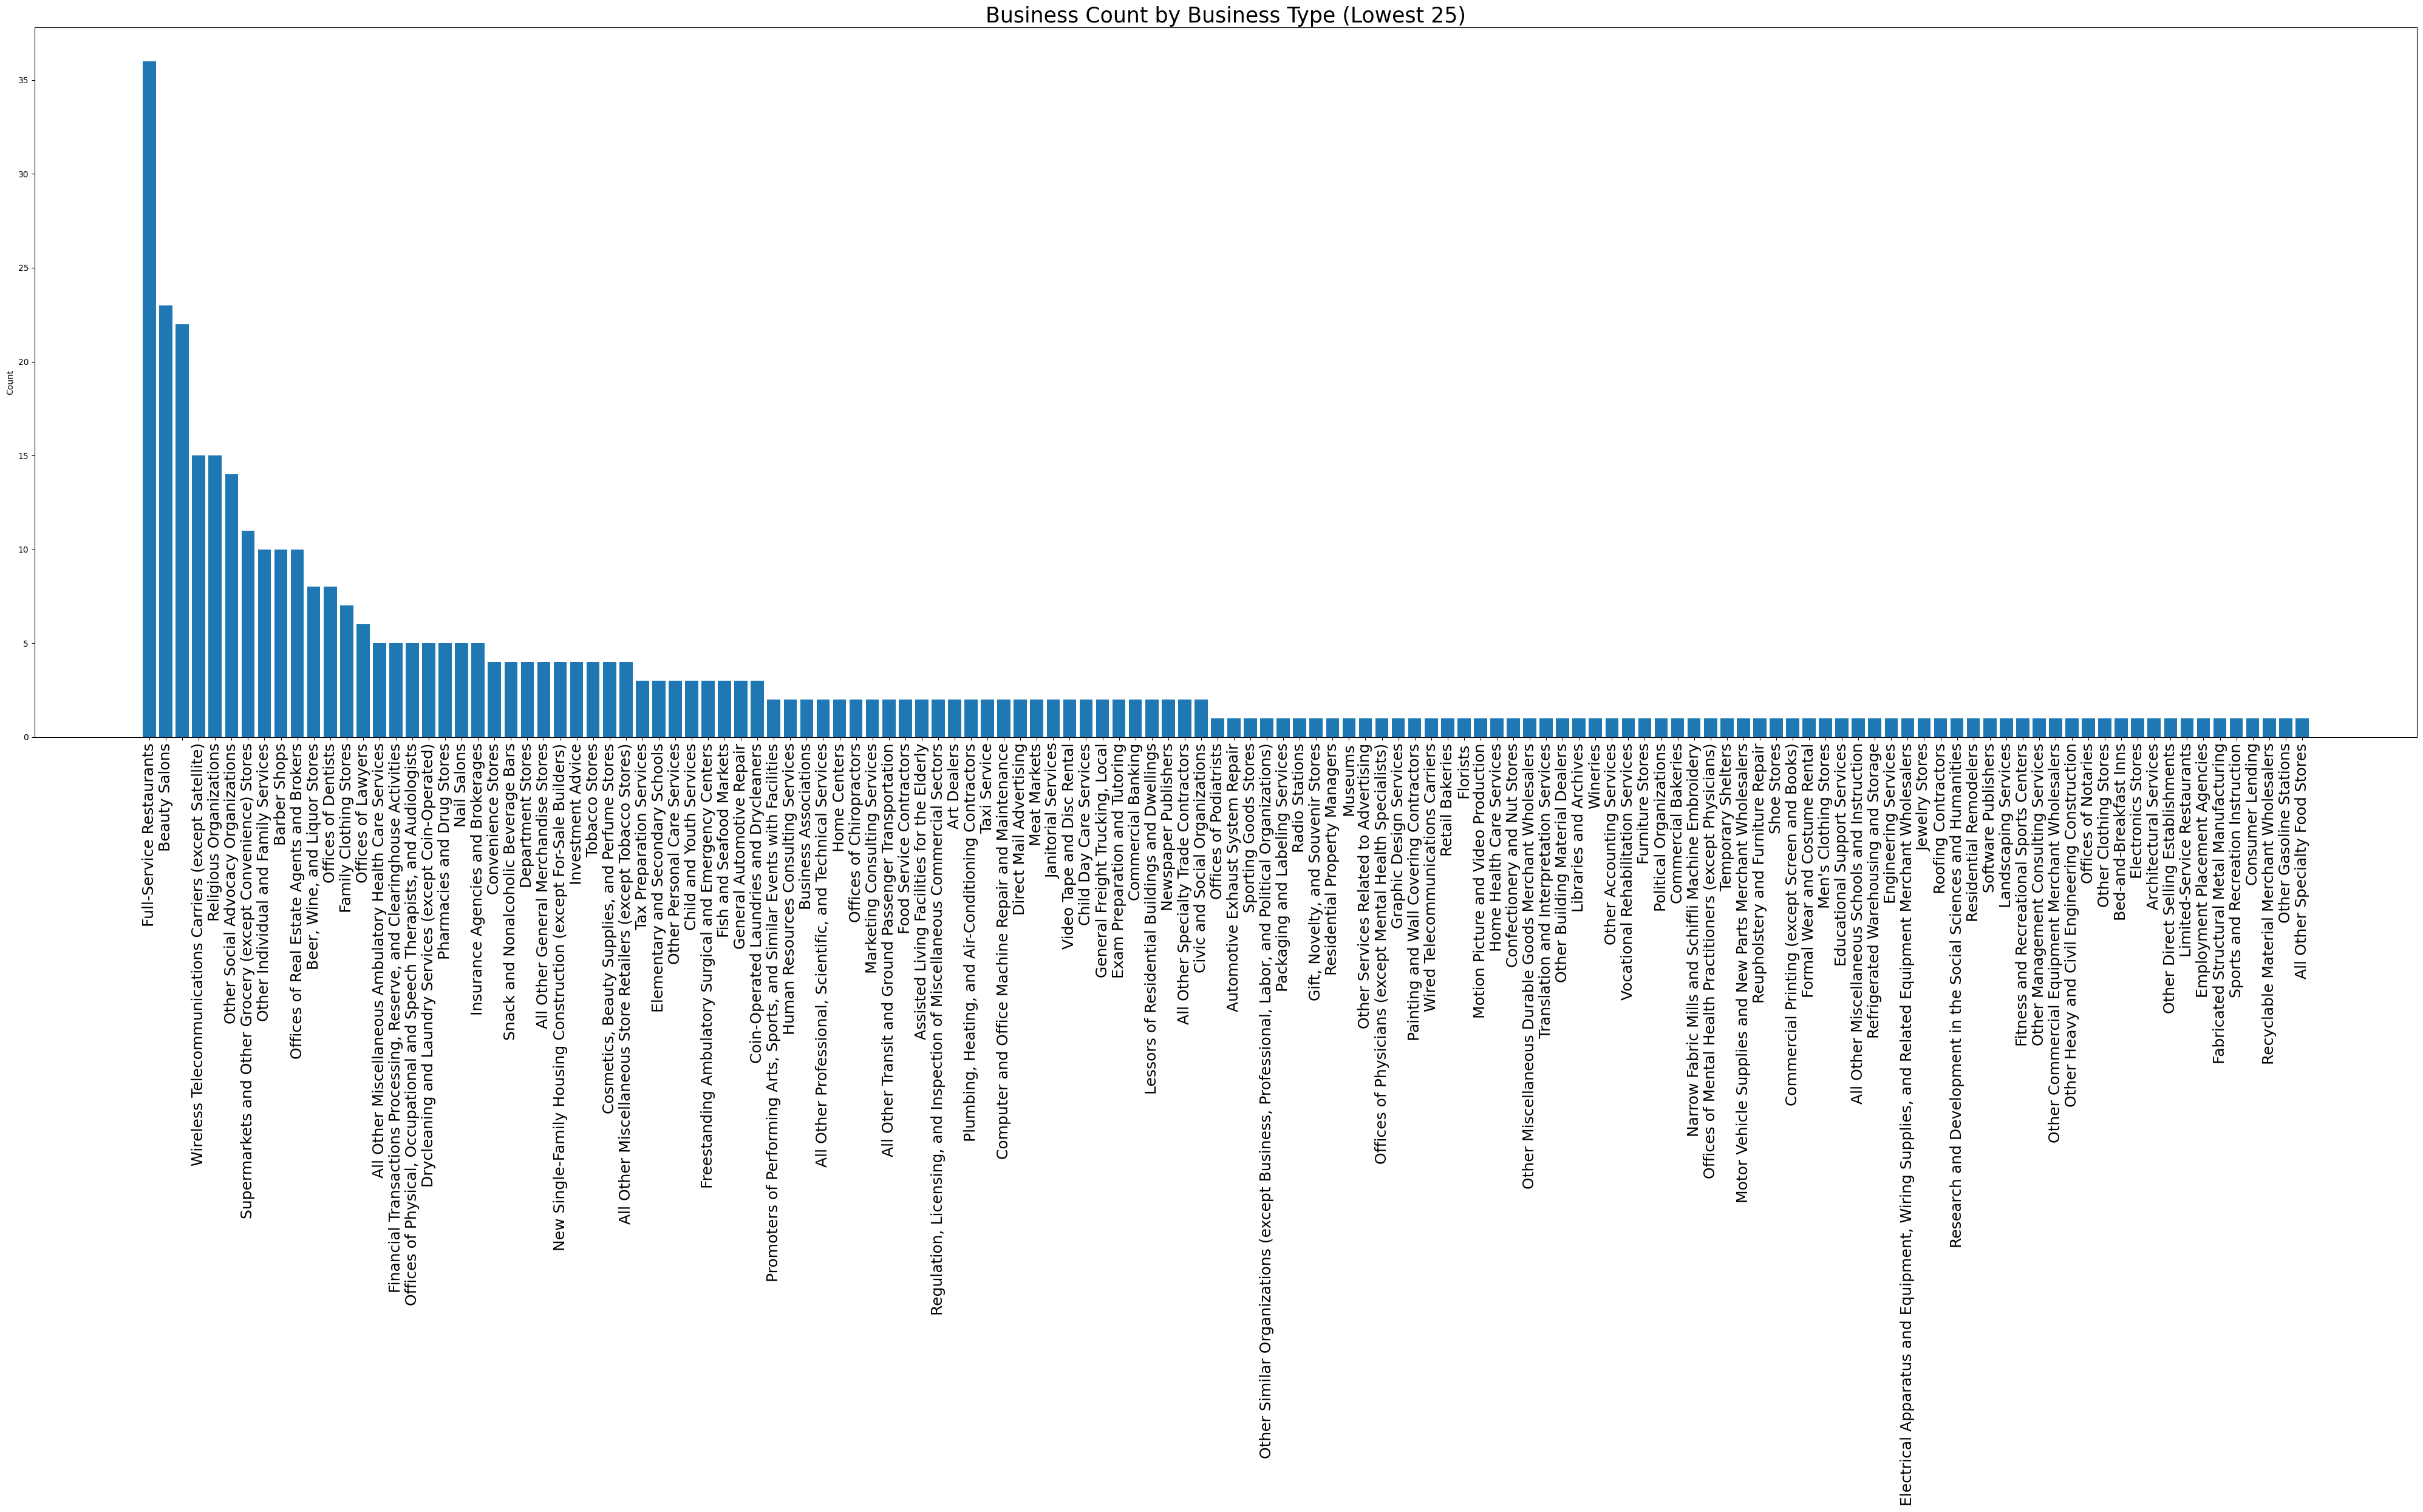

In [8]:
# make a bar graph of the 25 most common business types
business_count = df.NAICS_2017_6digit_desc.value_counts()
x_data = business_count.index
y_data = business_count
df_new = pd.DataFrame({'Business_type':x_data, "Count":y_data})

df_new = df_new.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(40,25))
plt.bar(x_data, y_data)
plt.xticks(fontsize = 18, rotation=90)
plt.ylabel('Count')
plt.title('Business Count by Business Type (Lowest 25)', fontsize = 25)
plt.tight_layout()
plt.savefig('Business Type Count (Lowest 25).jpg')
plt.show()

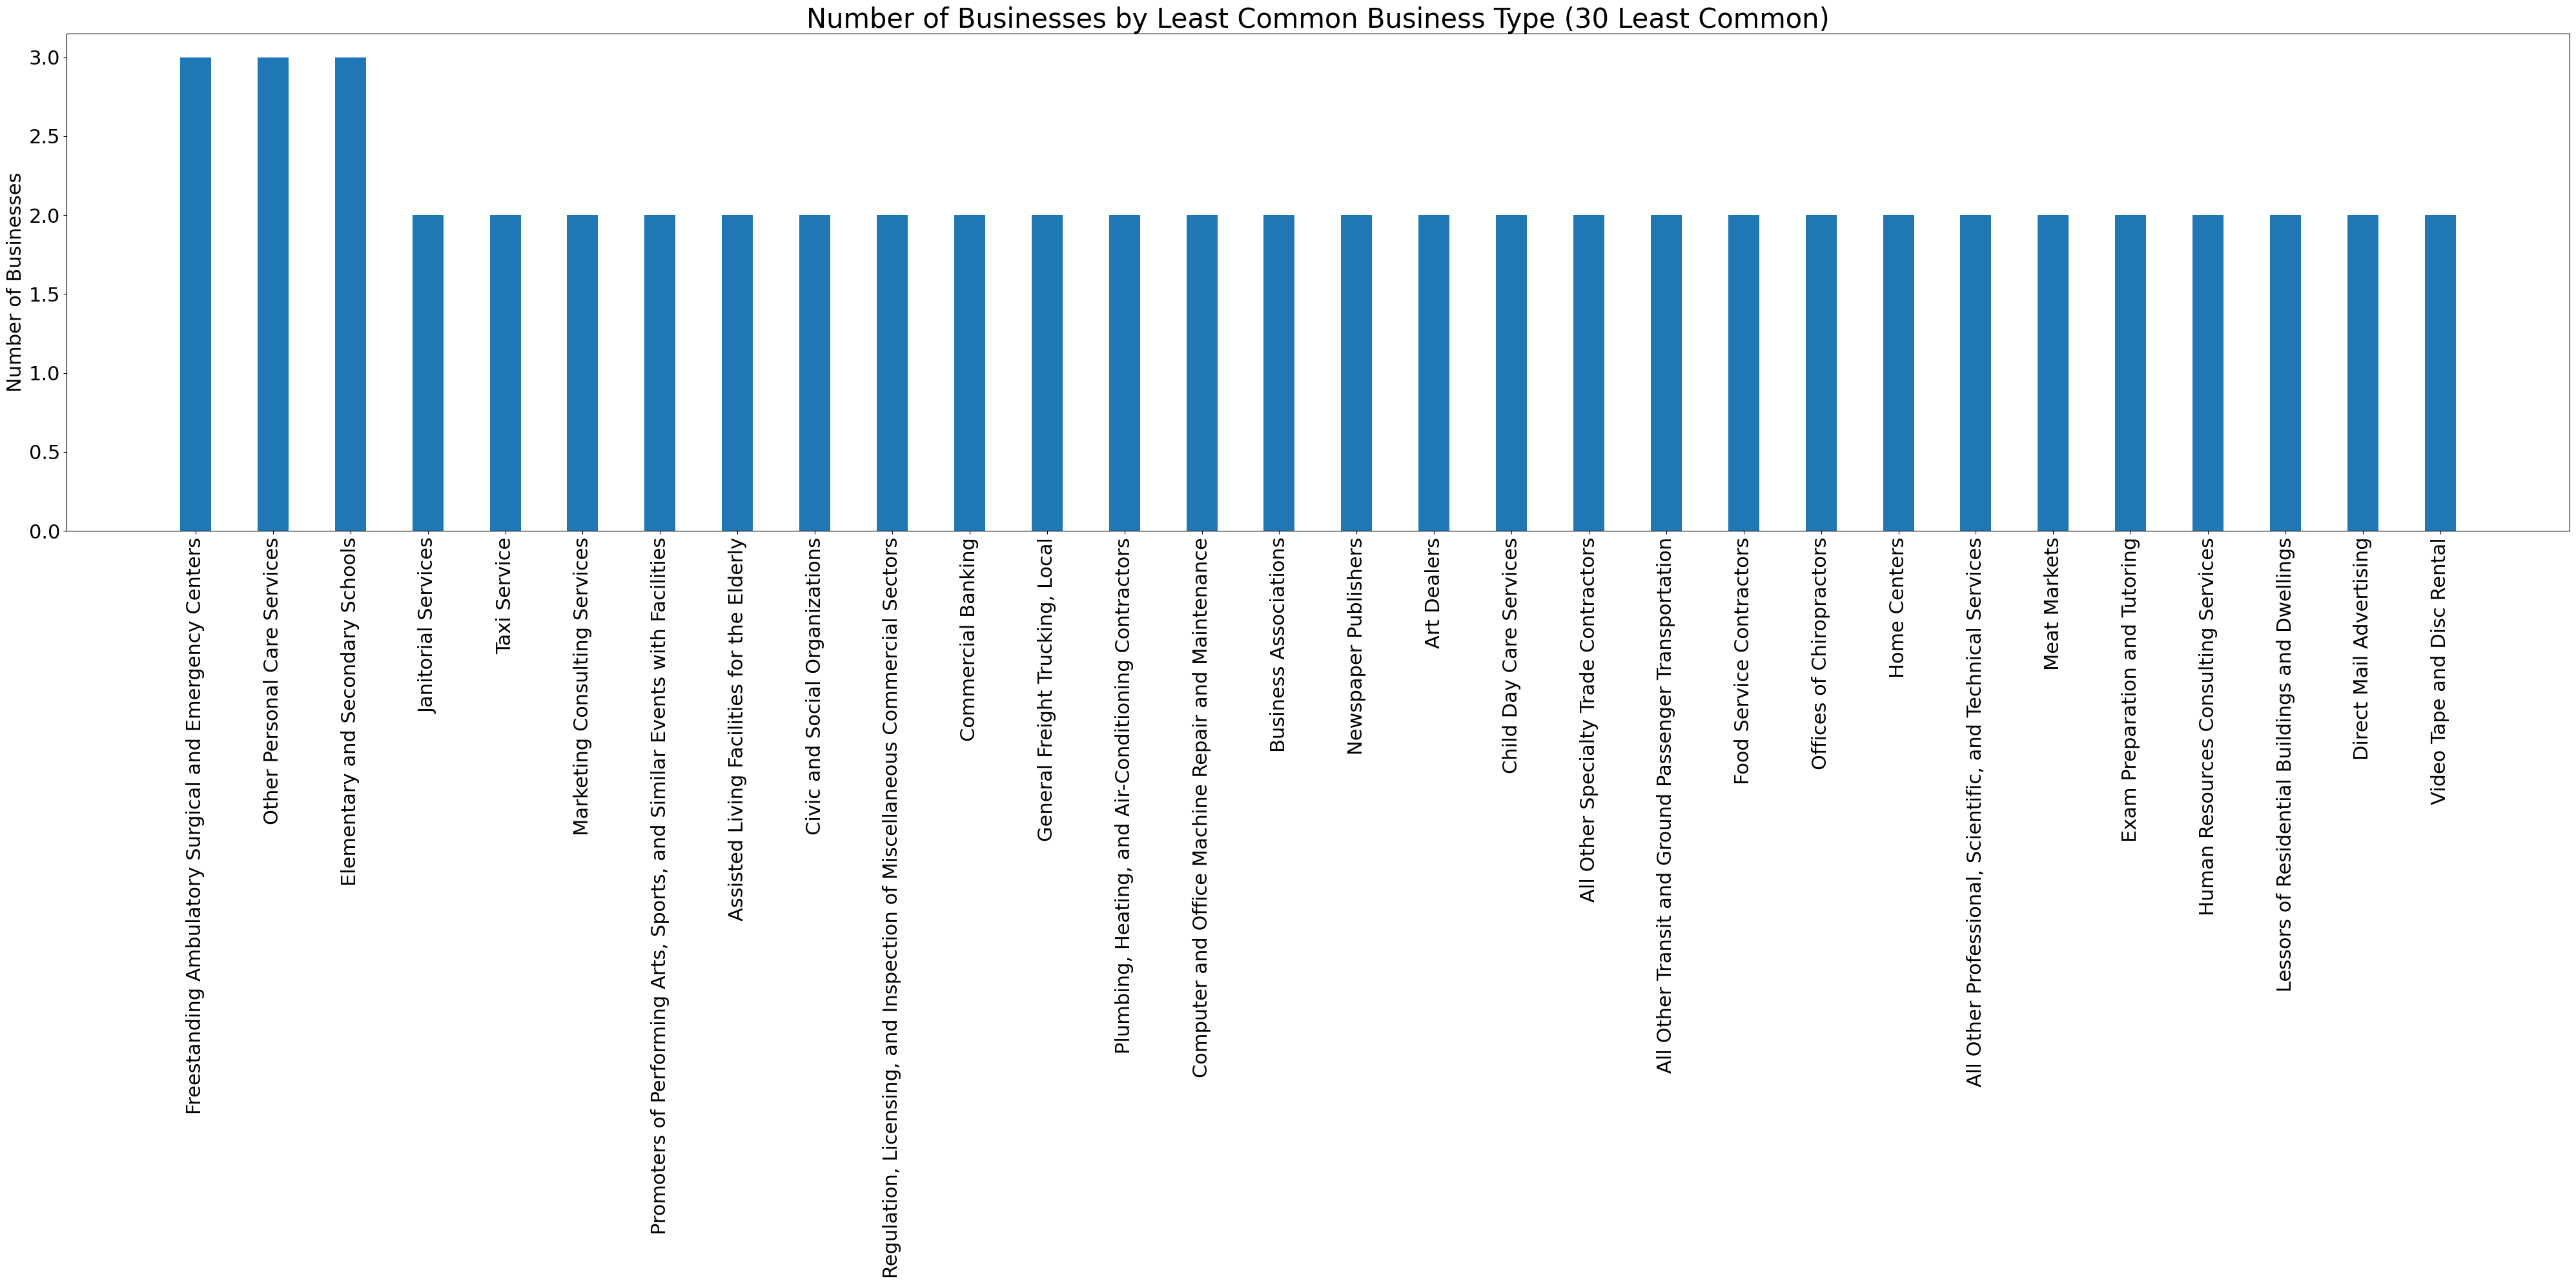

In [20]:
business_count = df.NAICS_2017_6digit_desc.value_counts()
x_data = business_count.index
y_data = business_count
df_new = pd.DataFrame({'Business_type':x_data, "Count":y_data})
df_new.to_csv("Business_type_count.csv",index=False)

# find the 10 least business types
least_business_types = df.NAICS_2017_6digit_desc.value_counts().tail(30)
least_business_types_list = least_business_types.index.tolist()
least_business_types_count = least_business_types.tolist()

# make a bar graph of the 30 least business types
plt.figure(figsize=(40,20))
plt.bar(least_business_types_list, least_business_types_count, width = .4)
plt.yticks(fontsize = 22)
plt.xticks(rotation=90, fontsize = 22)
plt.ylabel('Number of Businesses', fontsize = 22)
plt.title('Number of Businesses by Least Common Business Type (30 Least Common)', fontsize = 30)
plt.tight_layout()
plt.savefig('Number of Businesses by Least Common Business Type (30 Least Common) .jpg')
plt.show()


In [2]:
# make a bar chart that shows the average distance between businesses of the same type, excluding businesses with less than 2 businesses of that type
# find the business types with less than 2 businesses
business_types = df.NAICS_2017_6digit_desc.value_counts()
business_types = business_types[business_types < 2]
# remove the businesses with less than 2 businesses
df = df[~df.NAICS_2017_6digit_desc.isin(business_types.index)]
# find the average distance between businesses of the same type
# find the unique business types
business_types = df.NAICS_2017_6digit_desc.unique()

# find the average distance between each business type and save it to a dictionary
distance_dict = {}
for business_type in business_types:
    # find the businesses of the current business type
    df_business = df[df.NAICS_2017_6digit_desc == business_type]
    # find the average distance between each business and save it to a dictionary
    distance_list = []
    for index, row in df_business.iterrows():
        # find the distance between the current business and all other businesses
        for index2, row2 in df_business.iterrows():
            if index != index2:
                distance = geopy.distance.distance((row['latitude'], row['longitude']), (row2['latitude'], row2['longitude'])).miles
                distance_list.append(distance)
    # find the average distance between businesses
    average_distance = sum(distance_list) / len(distance_list)
    distance_dict[business_type] = average_distance

# find the business type with the largest average distance
largest_distance = max(distance_dict.values())
largest_business_type = max(distance_dict, key=distance_dict.get)

# find the business type with the smallest average distance
smallest_distance = min(distance_dict.values())
smallest_business_type = min(distance_dict, key=distance_dict.get)

# print the results
print("The business type with the largest average distance between businesses is " + largest_business_type + " with an average distance of " + str(largest_distance) + " miles.")
print("The business type with the smallest average distance between businesses is " + smallest_business_type + " with an average distance of " + str(smallest_distance) + " miles.")

# make a bar graph of the business type and their average distance
plt.figure(figsize=(30,10))
plt.bar(distance_dict.values(), distance_dict.keys())
plt.xticks(rotation=90)
plt.xlabel("Average Distance Between Businesses (miles)")
plt.ylabel('Industry')

NameError: name 'df' is not defined

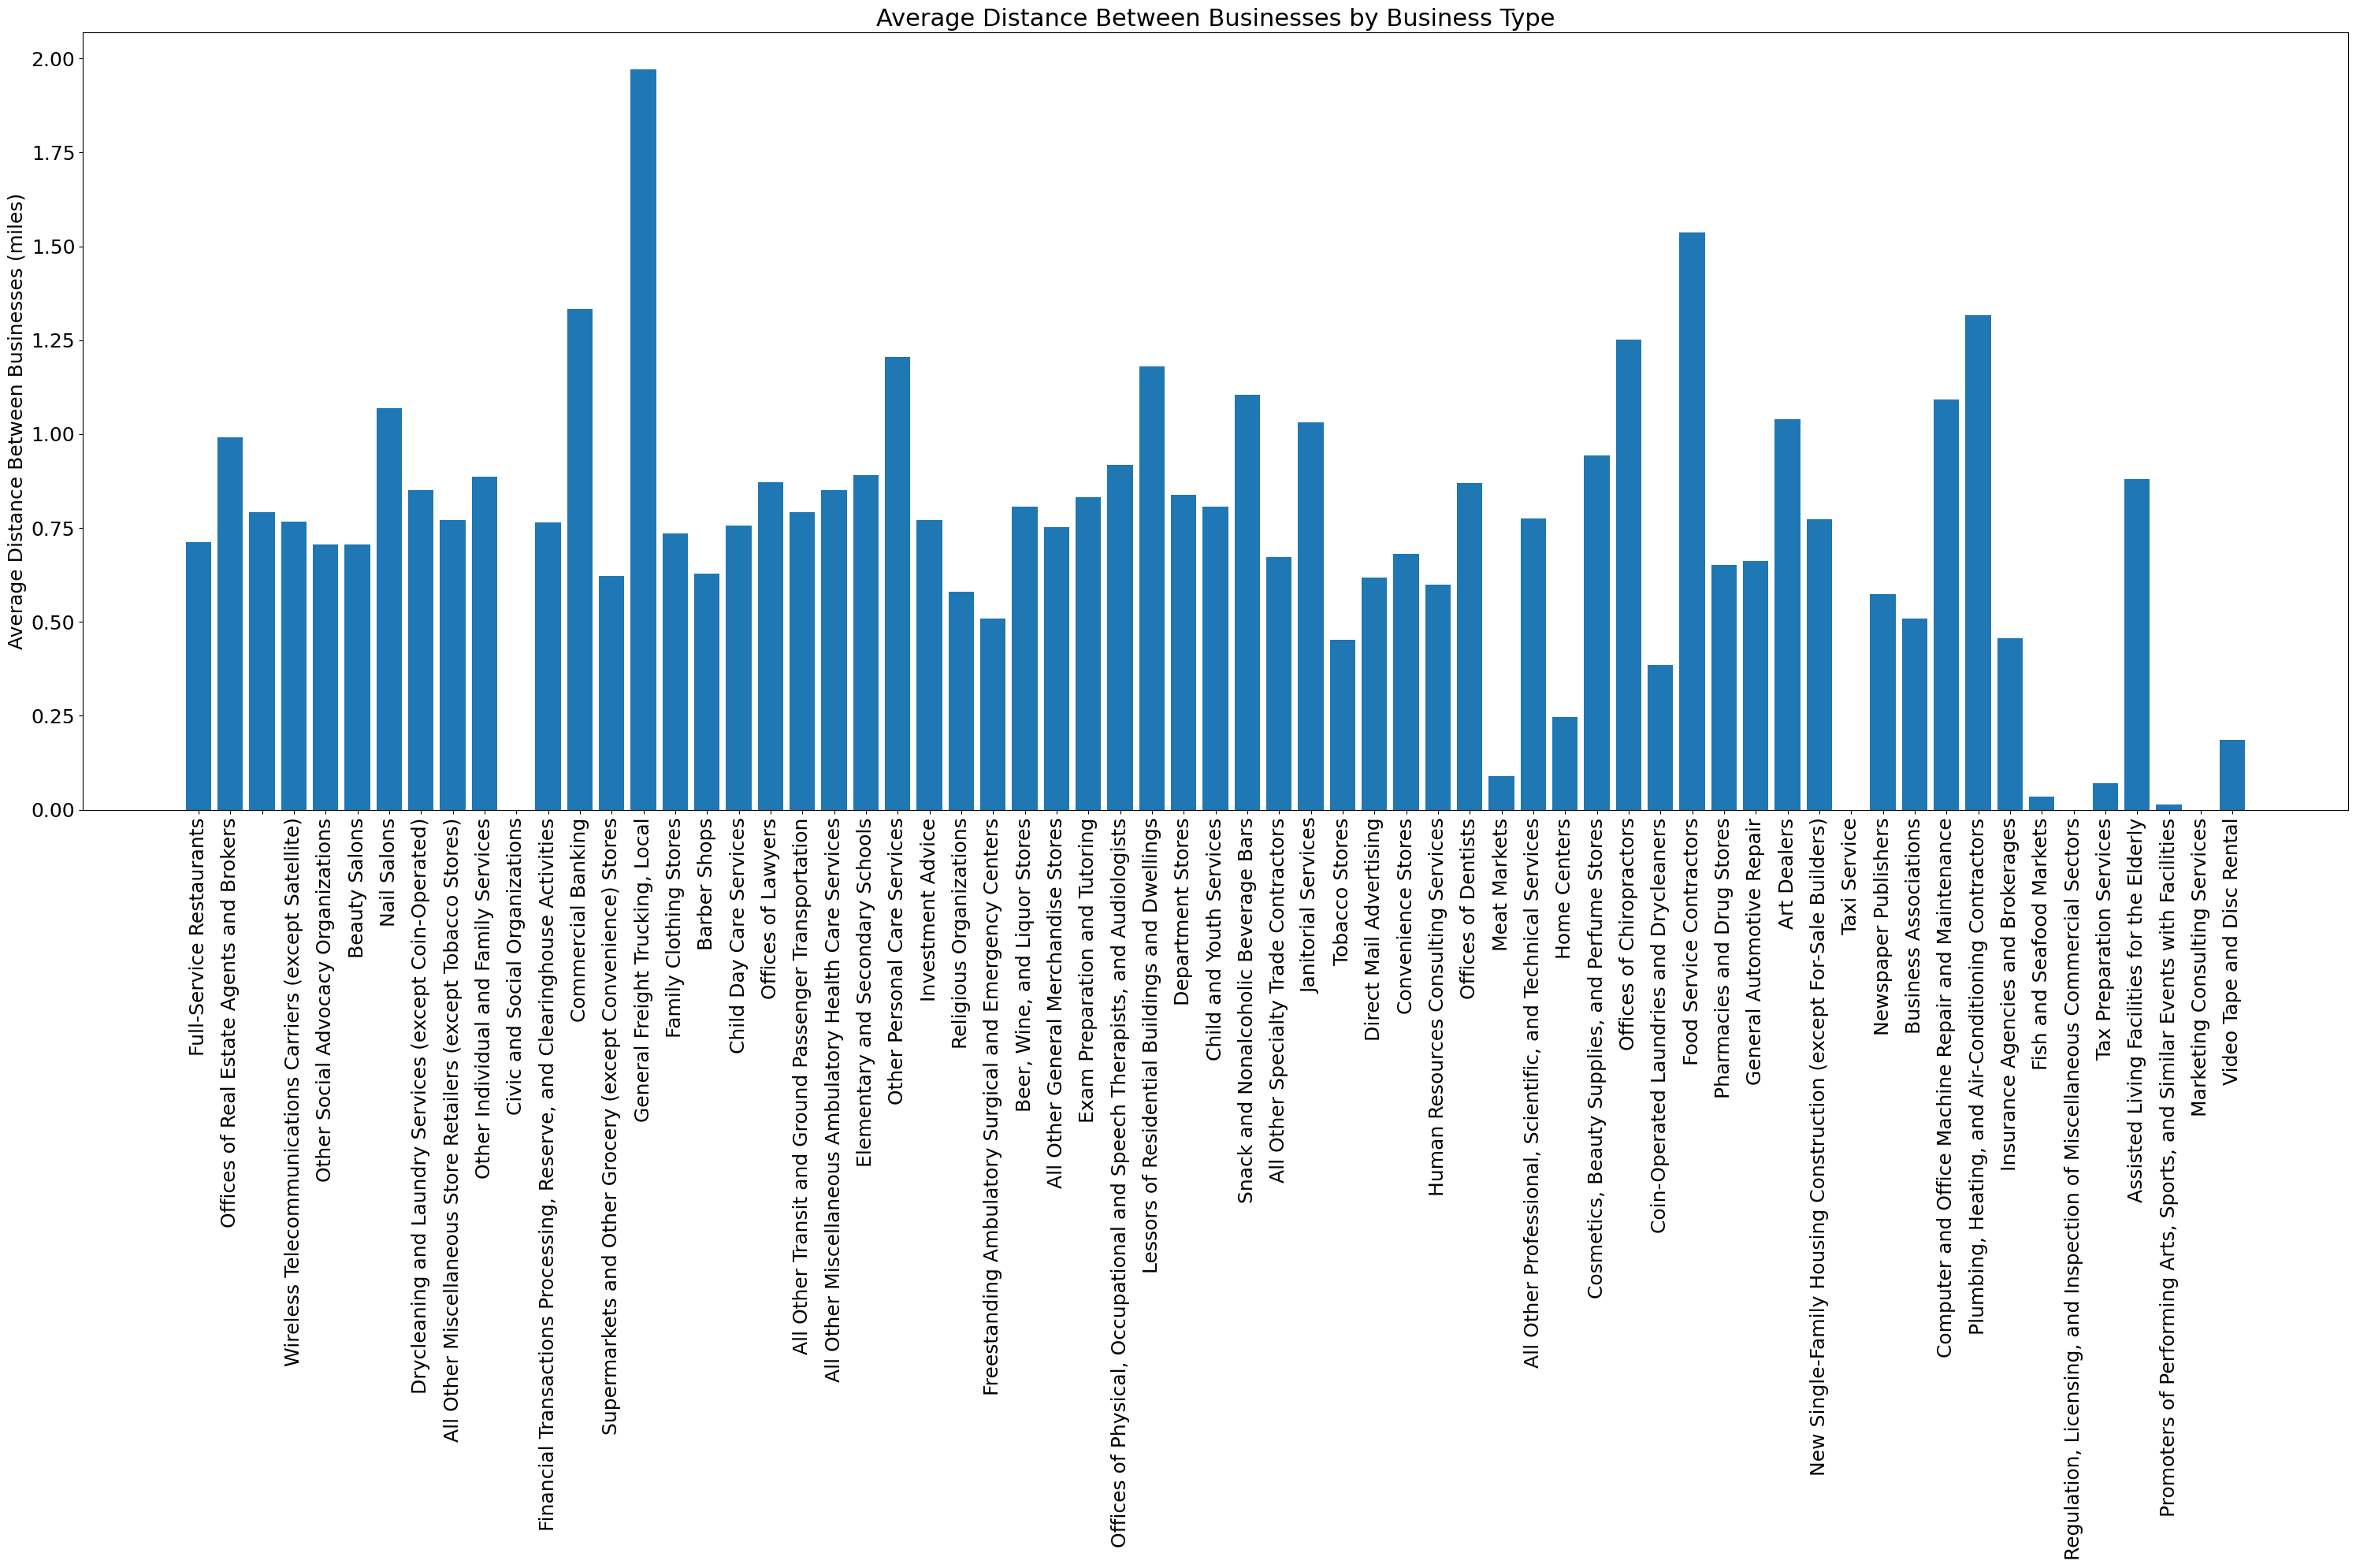

In [17]:
# find the business types with a count less than 2
count_less_than_2 = []
for business_type in business_types:
    if df.NAICS_2017_6digit_desc.value_counts()[business_type] < 2:
        count_less_than_2.append(business_type)

# remove the business types with a count less than 2 from the distance_dict
for business_type in count_less_than_2:
    distance_dict.pop(business_type, None)

# make a bar graph of the business type and their average distance
plt.figure(figsize=(30,20))
plt.bar(distance_dict.keys(), distance_dict.values())
plt.xticks(rotation=90, fontsize = 18)
plt.ylabel('Average Distance Between Businesses (miles)', fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Average Distance Between Businesses by Business Type', fontsize = 22)
plt.tight_layout()
plt.savefig('Average Distance Between Businesses by Business Type 2.jpg')
plt.show()

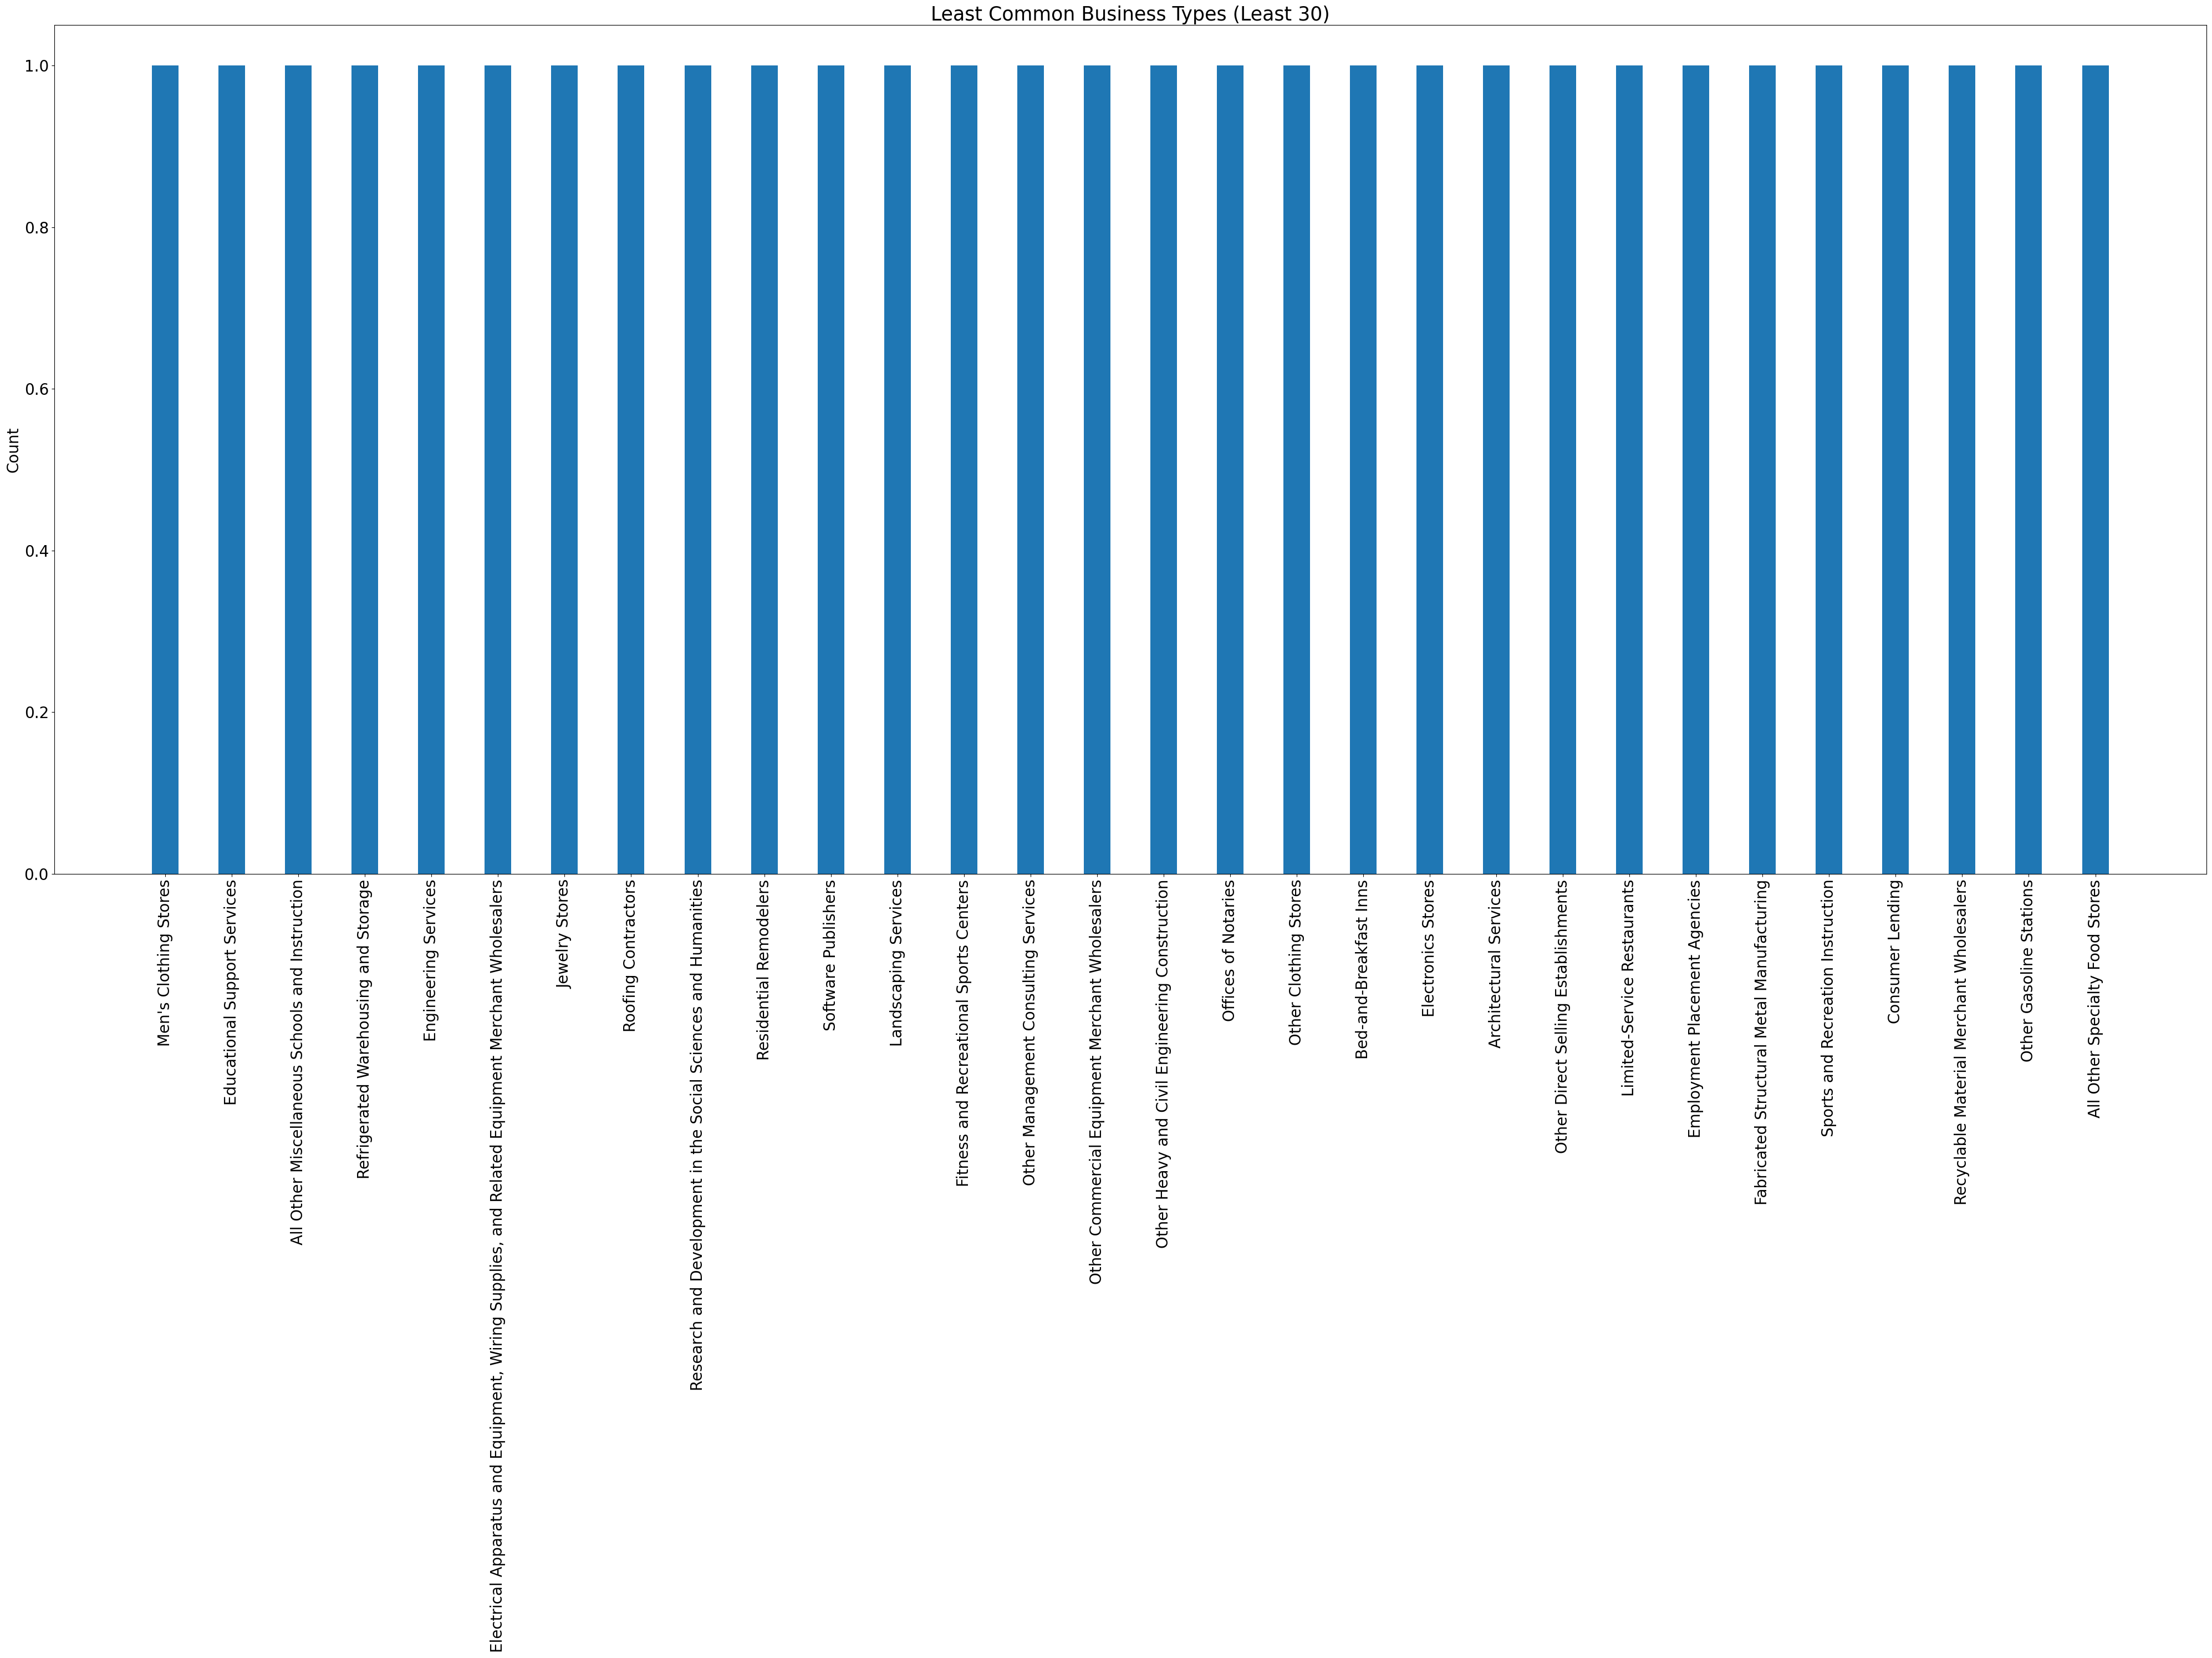

In [27]:
# find the 30 least common business types
df = pd.read_csv("Input/business_list_dis4.csv")
least_common_business_types = df.NAICS_2017_6digit_desc.value_counts().tail(30)

# make a bar graph of the business type and their average distance
plt.figure(figsize=(40,30))
plt.bar(least_common_business_types.index, least_common_business_types.values, width = .4)
plt.xticks(rotation=90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Least Common Business Types (Least 30)', fontsize = 25)
plt.tight_layout()
plt.savefig("Least Common Business Types (Least 30)")
plt.show()


In [28]:
business_count = df.NAICS_2017_6digit_desc.value_counts()
x_data = business_count.index
y_data = business_count
df_new = pd.DataFrame({'Business_type':x_data, "Count":y_data})
df_new.to_csv("Business_type_count.csv",index=False)
